# Problems for Weeks 1-2

**Name:** Fatema Elgebali 

**Student No.** 27671321

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Question1. (k-armed bandit problem)
(a)

In [149]:
N = 1000  # no. of pulls
a = [0, 1, 2]  # action on levers
lever1, lever2, lever3 = [], [], []
for i in range(N):
    lever1.append(np.random.normal(a[0], 1))
    lever2.append(np.random.normal(a[1], 1))
    lever3.append(np.random.normal(a[2], 1))

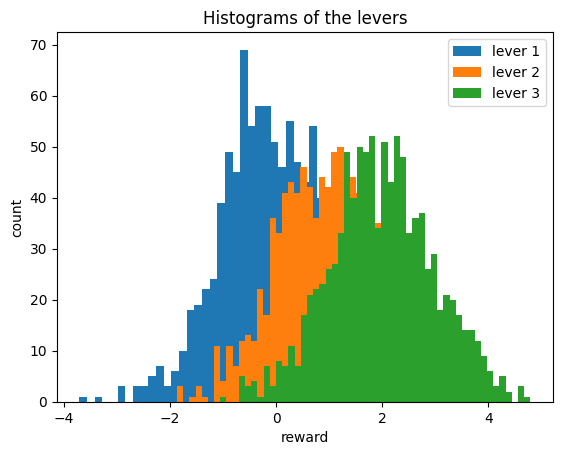

In [153]:
#plt.figure(figsize=(15, 7))
plt.hist(lever1, bins=50, label="lever 1")
plt.hist(lever2, bins=50, label="lever 2")
plt.hist(lever3, bins=50, label="lever 3")
plt.title("Histograms of the levers");
plt.xlabel("reward"); plt.ylabel("count"); plt.legend()
plt.show()

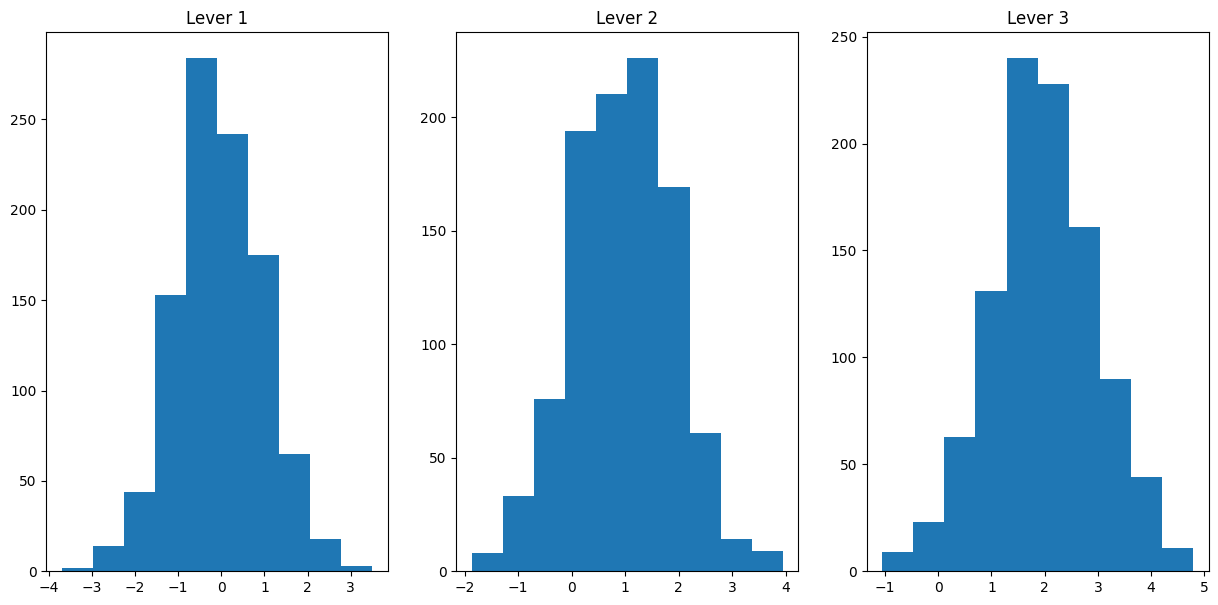

In [152]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 3, 1); plt.hist(lever1); plt.title("Lever 1")
plt.subplot(1, 3, 2); plt.hist(lever2); plt.title("Lever 2")
plt.subplot(1, 3, 3); plt.hist(lever3); plt.title("Lever 3")
plt.show()

In [199]:
print("The reward mean of lever 0", np.mean(lever1))
print("The reward mean of lever 1", np.mean(lever2))
print("The reward mean of lever 2", np.mean(lever3))

The reward mean of lever 0 -0.04270913687520644
The reward mean of lever 1 0.9646461212714249
The reward mean of lever 2 1.9859256562938075


The histogram of each lever's reward is centered at the lever's numbers, which are also the means of each reward. 
- Lever 0:
The rewards range between -4 and 3, centered at 0.

- Lever 1:
The rewards range between -2 and 4, centered at 1.

- Lever 2:
The rewards range between -1 and 5, centered at 2.

(b)

In [201]:
def Q(A, R):
    
    A = np.asarray(A)
    R = np.asarray(R)
    est_val0 = np.sum(R * (A == 0)) / np.sum((A == 0)) if (0 in A) else np.NINF
    est_val1 = np.sum(R * (A == 1)) / np.sum((A == 1)) if (1 in A) else np.NINF
    est_val2 = np.sum(R * (A == 2)) / np.sum((A == 2)) if (2 in A) else np.NINF
    
    return np.asarray([est_val0, est_val1, est_val2])

(c)

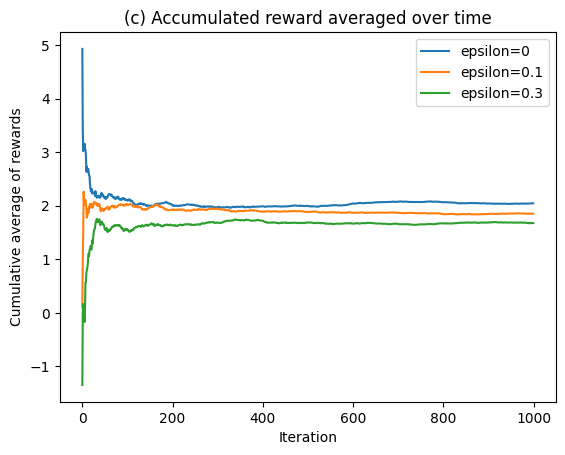

In [202]:
epsilon = [0, 0.1, 0.3]

for e in epsilon:
    A = [np.random.randint(0, 3)]
    R = [np.random.normal(A[0], 1)]
    for i in range(N-1):
        q = Q(A, R)
        if np.random.uniform() < e:
            new_action = np.random.randint(0, 3)
        else:
            new_action = q.argmax()

        A.append(new_action)
        R.append(np.random.normal(new_action, 1))

    average_R_over_time = np.cumsum(R) / np.arange(1, 1001)
    plt.plot(average_R_over_time, label="epsilon="+str(e))
    
plt.title("(c) Accumulated reward averaged over time")
plt.xlabel("Iteration")
plt.ylabel("Cumulative average of rewards")
plt.legend()
plt.show()

From the plot, the 3 curves of each $\varepsilon$ is close to 2 after multiple runs. We observe that the lower $\varepsilon$, the algorithm becomes more greedy. This is because the cumulative average of rewards at $\varepsilon = 0$ converges to a value higher than that of $\varepsilon = 0.1$ and $\varepsilon = 0.3$.

(d)

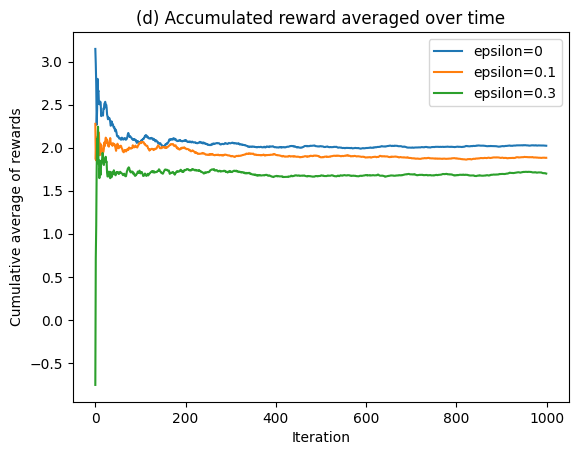

In [203]:
for e in epsilon:
    Q = [0, 0, 0]
    A = [np.random.randint(0, 3)]
    R = [np.random.normal(A[0], 1)]
    for n in range(1, N):
        alpha = 1/n
        Q[A[-1]] = (1-alpha) * Q[A[-1]] + alpha * R[-1]
        if np.random.uniform() < e:
            new_action = np.random.randint(0, 3)
        else:
            new_action = q.argmax()

        A.append(new_action)
        R.append(np.random.normal(new_action, 1))

    average_R_over_time = np.cumsum(R) / np.arange(1, 1001)
    plt.plot(average_R_over_time, label="epsilon="+str(e))
    
plt.title("(d) Accumulated reward averaged over time")
plt.xlabel("Iteration")
plt.ylabel("Cumulative average of rewards")
plt.legend()
plt.show()

As in (c), the accumulated reward averaged over time for $\varepsilon = 0$ converges to a value higher than that of the other epsilon values. But the curve for $\varepsilon = 0.1$ converges faster than the other curves.

## Question 2

(a)

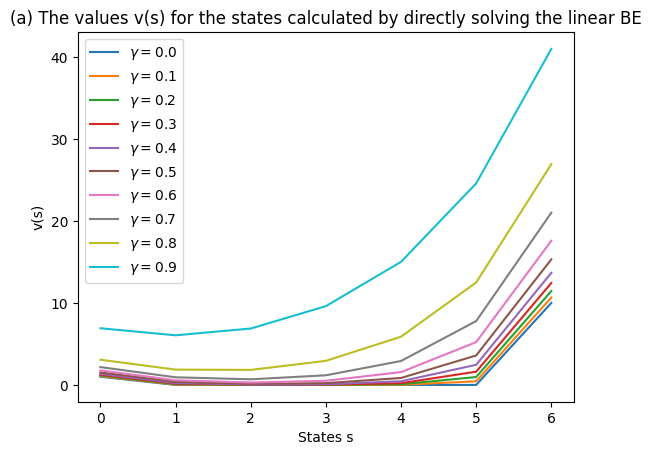

In [330]:
P = np.asarray([[0.6, 0.4 , 0. , 0. , 0. , 0. , 0. ],
                 [0.4 , 0.2, 0.4 , 0. , 0. , 0. , 0. ],
                 [0. , 0.4 , 0.2, 0.4 , 0. , 0. , 0. ],
                 [0. , 0. , 0.4 , 0.2, 0.4 , 0. , 0. ],
                 [0. , 0. , 0. , 0.4 , 0.2, 0.4 , 0. ],
                 [0. , 0. , 0. , 0. , 0.4 , 0.2, 0.4 ],
                 [0. , 0. , 0. , 0. , 0. , 0.4 , 0.6]])

reward = np.asarray([1, 0, 0, 0, 0, 0, 10])
discount = np.linspace(0, 0.9, 10)

for g in discount:
    g = np.round(g, 1)  # rounding the discount because we get values as gamma = 0.300000000000004 or 0.600000000001
    value = np.linalg.inv(np.eye(7, 7) - g*P) @ reward
    plt.plot(value, label=r"$\gamma=$"+str(g))
    
plt.title("(a) The values v(s) for the states calculated by directly solving the linear BE"); 
plt.xlabel("States s"); plt.ylabel("v(s)")
plt.legend()
plt.show()

(b)

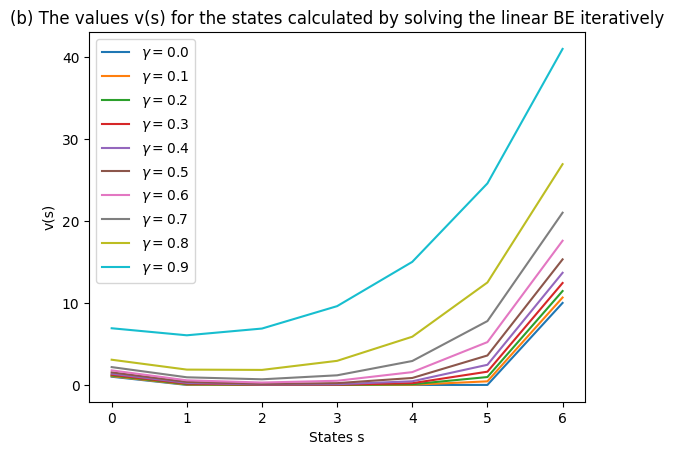

In [331]:
N = 1000
for g in discount:
    g = np.round(g, 1)     
    value = np.zeros(7)     # Initialize the value vector with zeros
    for n in range(N):
        value = reward + g* P@value
    
    plt.plot(value, label=r"$\gamma=$"+str(g))
    
plt.title("(b) The values v(s) for the states calculated by solving the linear BE iteratively"); 
plt.xlabel("States s"); plt.ylabel("v(s)")
plt.legend()
plt.show()

(c)

In [332]:
def gen_trajectory(s, discount, N):
    pos = [s]
    acc_return = 0
    for i in range(N):
        cp = pos[-1]         # current position
        new_p = np.random.choice(np.arange(0, 7), p=P[cp])
        pos.append(new_p)
        acc_return += discount**i * reward[cp]
        
    return acc_return

print("The return accumulated", gen_trajectory(0, 0.5, 1000))

The return accumulated 1.994702350465568


(d)

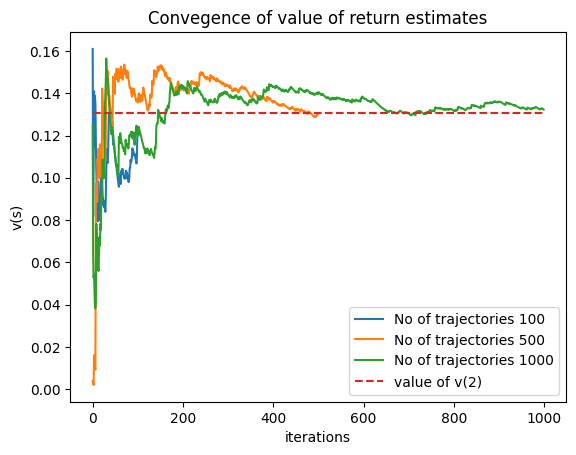

In [341]:
N = [10**2, 5*10**2, 10**3] # no. of trajectories
for n in N:
    acc_traj = []
    traj = []
    for i in range(n):
        traj.append(gen_trajectory(2, 0.5, 100))
        acc_traj.append(sum(traj)/(i+1))
        
    plt.plot(acc_traj, label="No of trajectories "+str(n))
 

value = np.linalg.inv(np.eye(7, 7) - 0.5*P) @ reward
plt.plot(np.repeat(value[2], 1000), label="value of v(2)", ls='--')
plt.title("Convegence of value of return estimates")
plt.xlabel("iterations"); plt.ylabel("v(s)")
plt.legend()
plt.show()    

From the plot, we find that the higher the number of the trajectory, it converges to the actual value of state, in our case $s = 2$, $v(2)$.

## Question 3

(a)

The transition probabilities $p(s^\prime | s, a)$ for

- MoveRight action $(a = 0)$

$$ p(s^\prime | s, 0) = 
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0
\end{bmatrix}
$$

- MoveRight action $(a = 1)$

$$ p(s^\prime | s, 1) = 
\begin{bmatrix}
0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}
$$

In [205]:
P_mr = np.asarray([[0, 1, 0, 0, 0, 0, 0],
                 [0, 0, 1, 0, 0, 0, 0],
                 [0, 0, 0, 1, 0, 0, 0],
                 [0, 0, 0, 0, 1, 0, 0],
                 [0, 0, 0, 0, 0, 1, 0],
                 [0, 0, 0, 0, 0, 0, 1],
                 [0, 0, 0, 0, 0, 0, 1]])

P_ml = np.asarray([[1, 0, 0, 0, 0, 0, 0],
                 [1, 0, 0, 0, 0, 0, 0],
                 [0, 1, 0, 0, 0, 0, 0],
                 [0, 0, 1, 0, 0, 0, 0],
                 [0, 0, 0, 1, 0, 0, 0],
                 [0, 0, 0, 0, 1, 0, 0],
                 [0, 0, 0, 0, 0, 1, 0]])

(b)

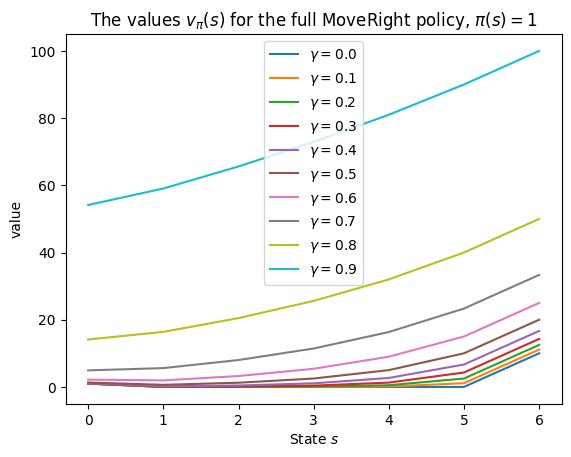

In [208]:
discount = np.linspace(0, 0.9, 10)
# MoveRight policy
for g in discount:
    g = np.round(g, 1)     # rounding the discount because we get values as gamma = 0.300000000000004 or 0.600000000001
    value = np.linalg.inv(np.eye(7, 7) - g*P_mr) @ reward
    plt.plot(value, label=r"$\gamma=$"+str(g))
    
plt.title(r"The values $v_\pi(s)$ for the full MoveRight policy, $\pi (s)=1$")
plt.xlabel(r"State $s$"); plt.ylabel("value"); plt.legend()
plt.show()

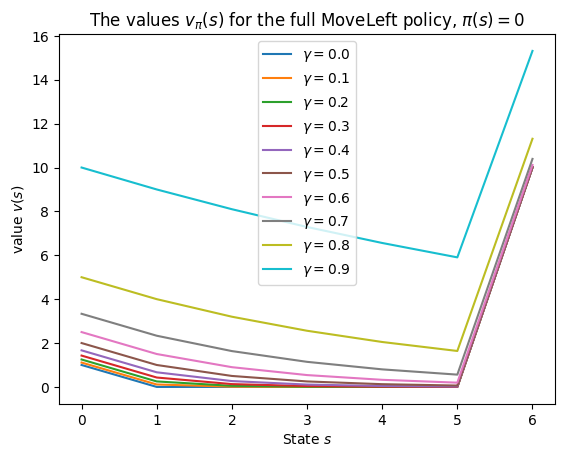

In [209]:
# MoveLeft policy
for g in discount:
    g = np.round(g, 1)     # rounding the discount because we get values as gamma = 0.300000000000004 or 0.600000000001
    value = np.linalg.inv(np.eye(7, 7) - g*P_ml) @ reward
    plt.plot(value, label=r"$\gamma=$"+str(g))
    
plt.title(r"The values $v_\pi(s)$ for the full MoveLeft policy, $\pi (s)=0$")
plt.xlabel(r"State $s$"); plt.ylabel(r"value $v(s)$"); plt.legend()
plt.legend()
plt.show()

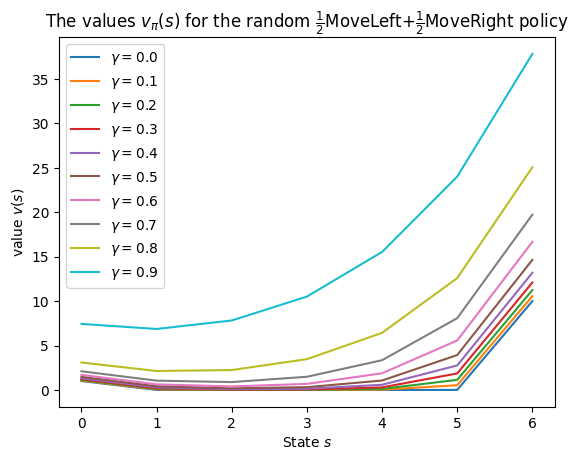

In [210]:
discount = np.linspace(0, 0.9, 10)
P_ml_mr = (1/2)*P_ml + (1/2)*P_mr
for g in discount:
    g = np.round(g, 1)     # rounding the discount because we get values as gamma = 0.300000000000004 or 0.600000000001
    value = np.linalg.inv(np.eye(7, 7) - g*P_ml_mr) @ reward
    plt.plot(value, label=r"$\gamma=$"+str(g))
    
plt.title(r"The values $v_\pi(s)$ for the random $\frac{1}{2}$MoveLeft$+$$\frac{1}{2}$MoveRight policy")
plt.xlabel(r"State $s$"); plt.ylabel(r"value $v(s)$"); plt.legend()
plt.show()

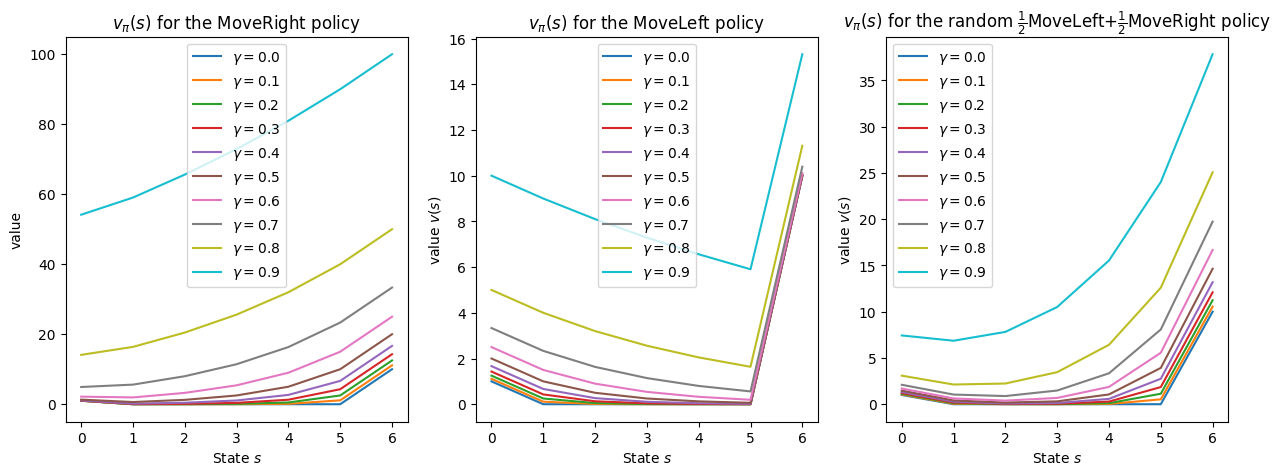

In [214]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
for g in discount:
    g = np.round(g, 1)     
    value = np.linalg.inv(np.eye(7, 7) - g*P_mr) @ reward
    plt.plot(value, label=r"$\gamma=$"+str(g))   
plt.title(r"$v_\pi(s)$ for the MoveRight policy")
plt.xlabel(r"State $s$"); plt.ylabel("value"); plt.legend()

plt.subplot(1, 3, 2)
for g in discount:
    g = np.round(g, 1)
    value = np.linalg.inv(np.eye(7, 7) - g*P_ml) @ reward
    plt.plot(value, label=r"$\gamma=$"+str(g))
    
plt.title(r"$v_\pi(s)$ for the MoveLeft policy")
plt.xlabel(r"State $s$"); plt.ylabel(r"value $v(s)$"); plt.legend()
plt.legend()

plt.subplot(1, 3, 3)
P_ml_mr = (1/2)*P_ml + (1/2)*P_mr
for g in discount:
    g = np.round(g, 1) 
    value = np.linalg.inv(np.eye(7, 7) - g*P_ml_mr) @ reward
    plt.plot(value, label=r"$\gamma=$"+str(g))
    
plt.title(r"$v_\pi(s)$ for the random $\frac{1}{2}$MoveLeft$+$$\frac{1}{2}$MoveRight policy")
plt.xlabel(r"State $s$"); plt.ylabel(r"value $v(s)$"); plt.legend()

plt.show()

At state $s = 0$, the value of the expected return for the MoveLeft policy is less than that of the MoveRight policy, while $v_\pi (0)$ for the $\frac{1}{2}$MoveLeft$+$$\frac{1}{2}$MoveRight policy is the least value.

For the MoveRight policy, we observe that the $v_\pi(5)$ drops for every discount value $\gamma \geq 0.3$.

(c) 

From the notes, the optimal return value function is
$$ v_*(s) = \max_a \mathbb{E}[R_{t+1} + \gamma v_*(s)(s_{t+1}) | S_t = s, A_t = a] $$

We have two actions, $a=0$ and $a=1$, and one $s^\prime$.
$$ v_*(s) = \max\{\mathbb{E}[R_{t+1} + \gamma v_*(s)(s_{t+1}) | S_t = s, A_t = 0], \mathbb{E}[R_{t+1} + \gamma v_*(s)(s_{t+1}) | S_t = s, A_t = 1]\} $$

For non-extreme states $s = 1, 2, 3, 4, 5$:

$$ v_*(s) = \max\{\mathbb{E}[\gamma v_*(s)(s_{t+1}) | S_t = s, A_t = 0], \mathbb{E}[\gamma v_*(s)(s_{t+1}) | S_t = s, A_t = 1]\} $$

For extreme states 0 and 6:

- If $s = 0$:

$$ v_*(s) = \max\{\mathbb{E}[1 + \gamma v_*(s)(0) | S_t = 0, A_t = 0], \mathbb{E}[1 + \gamma v_*(s)(1) | S_t = 0, A_t = 1]\} $$

- If $s = 6$:

$$ v_*(s) = \max\{\mathbb{E}[10 + \gamma v_*(s)(5) | S_t = 6, A_t = 0], \mathbb{E}[10 + \gamma v_*(s)(6) | S_t = 6, A_t = 1]\} $$

(d)

In [228]:
s = 2
N = 1000
discount = 0.5

value_left = np.linalg.inv(np.eye(7, 7) - discount*P_ml) @ reward
value_right = np.linalg.inv(np.eye(7, 7) - discount*P_mr) @ reward

optimal_policy = P_ml_mr.copy()
optimal_value = np.ones(7)
temp_v = np.ones(7)

for i in range(N):
    
    optimal_value = temp_v.copy()
    
    for s in list(range(7)):
        
        if s == 0:
            if optimal_value[0] > optimal_value[1]:
                optimal_policy[0] = P_ml[0]
                s = 0
            else:
                optimal_policy[0] = P_mr[0]
                s = 1

        elif s == 6:
            if optimal_value[6] > optimal_value[5]:
                optimal_policy[6] = P_mr[6]
                s = 6
            else:
                optimal_policy[6] = P_ml[6]
                s = 5

        else:
            if optimal_value[s-1] > optimal_value[s+1]:
                optimal_policy[s] = P_ml[s]
                s = s-1
            else:
                optimal_policy[s] = P_mr[s]
                s += 1
                
        temp_v = reward + discount* optimal_policy @ optimal_value
        
optimal_policy, optimal_value

(array([[1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 1.]]),
 array([ 2.  ,  1.  ,  1.25,  2.5 ,  5.  , 10.  , 20.  ]))

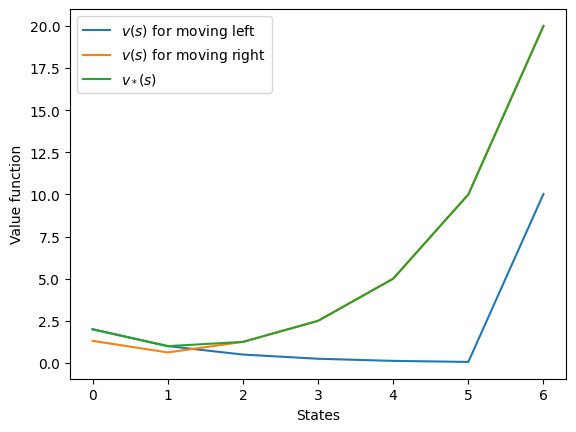

In [229]:
plt.plot(value_left, label=r"$v(s)$ for moving left")
plt.plot(value_right, label=r"$v(s)$ for moving right")
plt.plot(optimal_value, label=r"$v_*(s)$")
plt.xlabel("States"); plt.ylabel("Value function"); plt.legend(); plt.show()

The optimal value of the expected return $v_*(s)$ is the same as that of the MovingLeft policy which is higher than that of the MovingRight policy at states $s = 0, 1$. Then $v_*(s)$ is equal to $v_\pi(s), \pi(s) = 1$ starting from state $s=2$.

(f)

In [67]:
s = 2
N = 1000
discount = 0.5

value_left = np.linalg.inv(np.eye(7, 7) - discount*P_ml) @ reward
value_right = np.linalg.inv(np.eye(7, 7) - discount*P_mr) @ reward

optimal_policy = P_ml_mr.copy()
optimal_value = np.ones(7)

for i in range(N):
    
    #optimal_value = np.linalg.inv(np.eye(7, 7) - discount*optimal_policy) @ reward
    optimal_value = reward + discount* optimal_policy @ optimal_value
    
    for s in list(range(7)):
        if s == 0:
            if optimal_value[0] > optimal_value[1]:
                optimal_policy[0] = P_ml[0]
                s = 0
            else:
                optimal_policy[0] = P_mr[0]
                s = 1

        elif s == 6:
            if optimal_value[6] > optimal_value[5]:
                optimal_policy[6] = P_mr[6]
                s = 6
            else:
                optimal_policy[6] = P_ml[6]
                s = 5

        else:
            if optimal_value[s-1] > optimal_value[s+1]:
                optimal_policy[s] = P_ml[s]
                s = s-1
            else:
                optimal_policy[s] = P_mr[s]
                s += 1
        
optimal_policy, optimal_value

(array([[1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 1.]]),
 array([ 2.  ,  1.  ,  1.25,  2.5 ,  5.  , 10.  , 20.  ]))

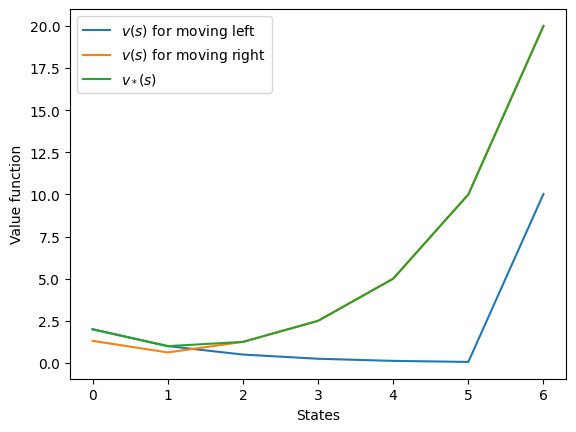

In [68]:
plt.plot(value_left, label=r"$v(s)$ for moving left")
plt.plot(value_right, label=r"$v(s)$ for moving right")
plt.plot(optimal_value, label=r"$v_*(s)$")
plt.xlabel("States"); plt.ylabel("Value function"); plt.legend(); plt.show()

(f) Adding the stay action does not change the optimal value function and optimal policy, because the expected return value of the transition of one state to itself will not be greater than that of the transition to a state on its right.

The optimal solution would change if moves from state 3 to state 6 were added. This is because the expected return optimal value of state 3 $v_*(3)$ will increase.

## Question 4. (Linear model: Temporal difference)

(a)

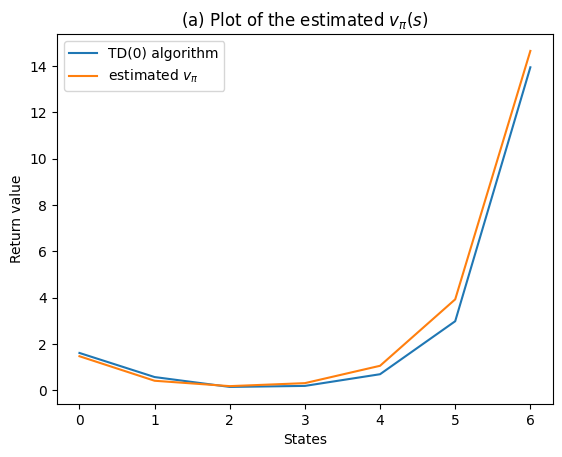

In [195]:
episodes = 1000
N = 1000
discount = 0.5
alpha = 0.1

value = np.ones(7)
def TD(policy):
    for _ in range(episodes):
        s = np.random.choice(list(range(7)))
        for n in range(N):
            A = policy[s]
            new_s = np.random.choice(list(range(7)), p=A)            
            R = reward[s]
            value[s] += alpha * (R + discount*value[new_s] - value[s])
            s = new_s        
    return value
  

value_ml_mr = np.linalg.inv(np.eye(7, 7) - discount*P_ml_mr) @ reward
plt.plot(TD(P_ml_mr), label="TD(0) algorithm")
plt.plot(value_ml_mr, label=r"estimated $v_\pi$")
plt.title(r"(a) Plot of the estimated $v_\pi (s)$")
plt.xlabel("States"); plt.ylabel("Return value"); plt.legend()
plt.show()

(b)

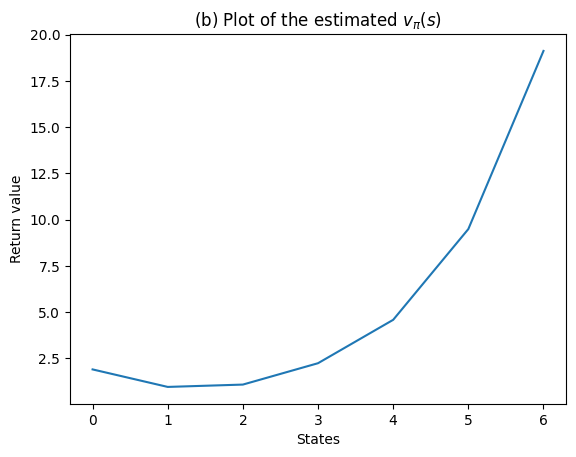

In [230]:
episodes = 1000; N = 1000
alpha = 0.2
epsilon = 0.1
Q = np.zeros((7, 2))
def sarsa():
    for _ in range(episodes):
        s = np.random.choice(list(range(7)))
        if np.random.uniform() < epsilon:
            A = np.random.randint(0, 2)
        else:
            A = Q[s].argmax()
        
        for n in range(N):
            if A == 0:
                new_s = np.random.choice(list(range(7)), p=P_ml[s])
            else:
                new_s = np.random.choice(list(range(7)), p=P_mr[s])
                
            R = reward[s]
            if np.random.uniform() < epsilon:
                new_A = np.random.randint(0, 2)
            else:
                new_A = Q[new_s].argmax()
            
            Q[s][A] = Q[s][A] + alpha * (R + discount*Q[new_s][new_A] - Q[s][A])
            s = new_s
            A = new_A         
    return Q

Q_sarsa = sarsa()
plt.plot(np.max(Q_sarsa, axis=1))
plt.title(r"(b) Plot of the estimated $v_\pi (s)$")
plt.xlabel("States"); plt.ylabel("Return value");
plt.show()

In [237]:
print("Optimal q:")
Q_sarsa

Optimal q:


array([[ 1.91033829,  1.43623902],
       [ 0.96397529,  0.51694325],
       [ 0.47507265,  1.0906349 ],
       [ 0.42247358,  2.24529627],
       [ 1.03825576,  4.58955307],
       [ 1.85820172,  9.49318226],
       [14.7255909 , 19.11957638]])

In [239]:
print("Optimal policy:")
Q_sarsa.argmax(axis=1)

Optimal policy:


array([0, 0, 1, 1, 1, 1, 1], dtype=int64)

(c)

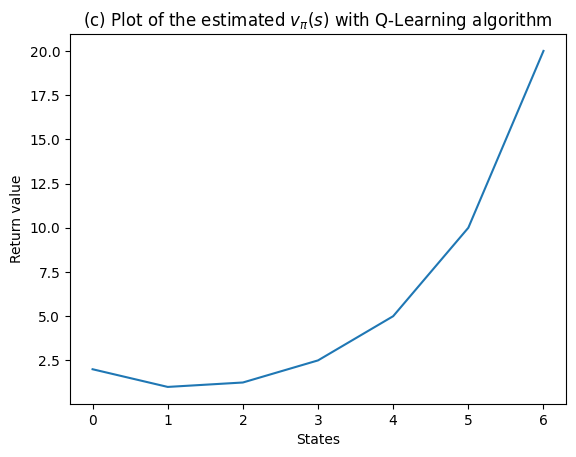

In [198]:
episodes = 1000; N = 1000
alpha = 0.2
epsilon = 0.1
discount = 0.5
reward = np.asarray([1, 0, 0, 0, 0, 0, 10])
Q = np.zeros((7, 2))
def Q_learning():
    for _ in range(episodes):
        s = np.random.choice(list(range(7)))
        
        for n in range(N):
            if np.random.uniform() < epsilon:
                A = np.random.randint(0, 2)
            else:
                A = Q[s].argmax()
            
            if A == 0:
                new_s = np.random.choice(list(range(7)), p=P_ml[s])
            else:
                new_s = np.random.choice(list(range(7)), p=P_mr[s])
                
            R = reward[s]

            new_A = Q[new_s].argmax()
            
            Q[s][A] = Q[s][A] + alpha * (R + discount*Q[new_s][new_A] - Q[s][A])
            s = new_s
            
    return Q

v_star = Q_learning()
plt.plot(np.max(v_star, axis=1))
plt.title(r"(c) Plot of the estimated $v_\pi (s)$ with Q-Learning algorithm")
plt.xlabel("States"); plt.ylabel("Return value");
plt.show()

In [240]:
print("Optimal q")
v_star

Optimal q


array([[ 2.        ,  1.5       ],
       [ 1.        ,  0.625     ],
       [ 0.5       ,  1.25      ],
       [ 0.62471845,  2.5       ],
       [ 1.25      ,  5.        ],
       [ 2.5       , 10.        ],
       [15.        , 20.        ]])

In [241]:
print("Optimal policy")
v_star.argmax(axis=1)

Optimal policy


array([0, 0, 1, 1, 1, 1, 1], dtype=int64)

(d) The difference between Sarsa and Q-Learning:
In Sarsa, we choose an action after initialising a state using the $\varepsilon-$greedy algorithm in each episode and also in each iteration, while in Q-Learning, we choose a new action using the $\varepsilon-$greedy algorithm in each iteration 

## Question 5

In [317]:
episodes = 1000; N = 1000
alpha = 0.2
epsilon = 0.1
discount = 0.9
Q = np.zeros((5, 5, 4))
grid_reward = np.zeros((5, 5)); grid_reward[0][1] = 10; grid_reward[0][3] = 5

def Q_learning():
    for _ in range(episodes):
        s = (np.random.choice(list(range(5))), np.random.choice(list(range(5))))
        
        for n in range(N):
            if np.random.uniform() < epsilon:
                A = np.random.randint(0, 4)
            else:
                A = Q[s].argmax()
                
            R = grid_reward[s[0]][s[1]]  # reward
            
            if s == (0, 1):            # in state A
                new_s = (4, 1)
                
            elif s == (0, 3):          # in state B
                new_s = (2, 3)
            
            elif A == 0:                 # Move North
                if s[0] == 0:
                    new_s = s
                    R = -1
                else:
                    new_s = (s[0]-1, s[1])
            elif A == 1:               # Move South
                if s[0] == 4:
                    new_s = s
                    R = -1
                else:
                    new_s = (s[0]+1, s[1])
            elif A == 2:               # Move East
                if s[1] == 4:
                    new_s = s
                    R = -1
                else:
                    new_s = (s[0], s[1]+1)
            else:                      # Move West
                if s[1] == 0:
                    new_s = s
                    R = -1
                else:
                    new_s = (s[0], s[1]-1)


            new_A = Q[new_s].argmax()
            
            Q[s][A] = Q[s][A] + alpha * (R + discount*Q[new_s][new_A] - Q[s][A])
            
            s = new_s
            
    return Q

grid_Q = Q_learning()

In [321]:
grid_Q

array([[[18.77973676, 17.80176308, 21.97748529, 18.77973676],
        [24.4194281 , 24.4194281 , 24.4194281 , 24.4194281 ],
        [18.77973676, 17.80176308, 17.47748529, 21.97748529],
        [19.4194281 , 19.41942568, 19.41941924, 19.41942642],
        [14.14802785, 14.15318738, 14.67325918, 17.47748529]],

       [[19.77973676, 16.02158677, 19.77973676, 16.80176308],
        [21.97748529, 17.80176308, 17.80176308, 17.80176308],
        [19.77973676, 16.02158677, 16.02158677, 19.77973676],
        [17.47748529, 14.41942356, 14.41933504, 17.80176308],
        [15.72973676, 12.83317426, 13.3063284 , 16.02158677]],

       [[17.80176308, 14.4194281 , 17.80176308, 15.02158677],
        [19.77973676, 16.02158677, 16.02158677, 16.02158677],
        [17.80176308, 14.4194281 , 14.4194281 , 17.80176308],
        [16.02158676, 12.97748529, 12.97748528, 16.02158677],
        [14.4194281 , 11.36612924, 11.15196233, 14.2110733 ]],

       [[16.02158677, 12.97748529, 16.02158677, 13.4194281 ],
  

In [318]:
print("The optimal value:")
np.max(grid_Q, axis=2)

The optimal value:


array([[21.97748529, 24.4194281 , 21.97748529, 19.4194281 , 17.47748529],
       [19.77973676, 21.97748529, 19.77973676, 17.80176308, 16.02158677],
       [17.80176308, 19.77973676, 17.80176308, 16.02158677, 14.4194281 ],
       [16.02158677, 17.80176308, 16.02158677, 14.4194281 , 12.97748529],
       [14.4194281 , 16.02158677, 14.4194281 , 12.97748529, 11.67961926]])

In [319]:
np.argmax(grid_Q, axis=2)

array([[2, 0, 3, 0, 3],
       [0, 0, 0, 3, 3],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=int64)

In [324]:
directions = ["N", "S", "E", "W"]
grid_policy = np.zeros((5, 5)).tolist()
for i in range(5):
    for j in range(5):
        grid_policy[i][j] = np.flatnonzero(np.round(grid_Q[i][j], 3) == np.round(np.max(grid_Q[i][j]), 3)).tolist()
        
policy_direction = np.zeros((5, 5), dtype=str).tolist()
for i in range(5):
    for j in range(5):
        for k in grid_policy[i][j]:
            policy_direction[i][j] += directions[k]
            
        policy_direction[i][j] += " "*(4-len(policy_direction[i][j]))
            
            
policy_direction

[['E   ', 'NSEW', 'W   ', 'NSEW', 'W   '],
 ['NE  ', 'N   ', 'NW  ', 'W   ', 'W   '],
 ['NE  ', 'N   ', 'NW  ', 'NW  ', 'N   '],
 ['NE  ', 'N   ', 'NW  ', 'NW  ', 'N   '],
 ['NE  ', 'N   ', 'NW  ', 'N   ', 'N   ']]

The optimal policy is close to the optimal solution obtained in Sutton and Barto's book, p. 65. There are different optimal policies in states (2, 4), (3, 4), (4, 4) and (4, 3). This is due to the small difference between the optimal q values of actions "North" and "West". The optimal v we obtained is also close to optimal solution in Sutton and Barto's book.